In [82]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 한글 폰트
import matplotlib
import matplotlib.font_manager as fm

# 1.
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

# # 2.
# matplotlib.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'NanumGothic'
# matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
# data load
data = pd.read_csv('전체데이터통합.CSV', encoding='cp949')

In [3]:
df = data.copy()
df.head()

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),배출량
0,2018-01-01,서귀포시,남원읍,11030.2331,9791.3235,11498.2617,10650.5811,13324.2924,10954.4914,15372.8110,...,2199680,24828201,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,1239600
1,2018-01-01,서귀포시,대륜동,17647.5285,10160.5833,15216.9486,10298.1857,14152.0528,11361.8229,12541.6031,...,354993,37971731,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,1717700
2,2018-01-01,서귀포시,대정읍,12538.2881,7792.5662,14360.4369,6043.2109,16053.7231,8710.5446,19530.3550,...,2730942,37142481,6.1,0.0,58.4,1018.5,7.72,0.0,0.0,1264950
3,2018-01-01,서귀포시,대천동,10539.1926,7307.2766,10214.4234,7677.3523,7645.1222,8157.7877,7511.4389,...,687498,39231391,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,1765600
4,2018-01-01,서귀포시,동홍동,20141.3526,7741.1595,22060.7555,8331.2173,28043.7082,8607.6880,31639.5584,...,2572840,69274797,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,4165050


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48421 entries, 0 to 48420
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   base_date       48421 non-null  object 
 1   city            48421 non-null  object 
 2   emd_nm          48421 non-null  object 
 3   0여성notvisit     48421 non-null  float64
 4   0여성visit        48421 non-null  float64
 5   0남성notvisit     48421 non-null  float64
 6   0남성visit        48421 non-null  float64
 7   10여성notvisit    48421 non-null  float64
 8   10여성visit       48421 non-null  float64
 9   10남성notvisit    48421 non-null  float64
 10  10남성visit       48421 non-null  float64
 11  20여성notvisit    48421 non-null  float64
 12  20여성visit       48421 non-null  float64
 13  20남성notvisit    48421 non-null  float64
 14  20남성visit       48421 non-null  float64
 15  30여성notvisit    48421 non-null  float64
 16  30여성visit       48421 non-null  float64
 17  30남성notvisit    48421 non-null 

In [6]:
df.shape

(48421, 54)

# Correlation

In [5]:
# 유동인구, 카드소비 데이터
df_fp = df.iloc[:, 3:41]
# df1 = df1.drop(columns = 'dayoff', axis=1)
df_fp.head()

,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,10남성visit,20여성notvisit,20여성visit,...,70여성notvisit,70여성visit,70남성notvisit,70남성visit,80여성notvisit,80여성visit,80남성notvisit,80남성visit,장기체류외국인,단기체류외국인
0,11030.2331,9791.3235,11498.2617,10650.5811,13324.2924,10954.4914,15372.8110,12625.9706,8269.5504,15354.9535,...,12181.3645,5337.4881,11864.8323,3302.1643,9313.4883,3581.6028,5048.0583,1258.6118,3217.1185,3552.3268
1,17647.5285,10160.5833,15216.9486,10298.1857,14152.0528,11361.8229,12541.6031,12196.2891,11551.7730,15218.0249,...,8256.8656,4781.0391,7828.6262,3660.0321,4756.9182,3304.4581,2626.1564,1394.6639,2926.3732,1347.0481
2,12538.2881,7792.5662,14360.4369,6043.2109,16053.7231,8710.5446,19530.3550,7145.9647,10281.0872,8805.2719,...,16124.0924,3951.6410,15862.1389,2460.7072,13545.1496,2777.5342,7111.8299,937.3813,5844.0823,1988.0280
3,10539.1926,7307.2766,10214.4234,7677.3523,7645.1222,8157.7877,7511.4389,9116.7211,6311.3124,9489.8313,...,3662.9227,3710.9718,4698.0571,2283.1244,2479.1482,2655.9199,1595.5814,871.3387,2538.0331,1072.5069
4,20141.3526,7741.1595,22060.7555,8331.2173,28043.7082,8607.6880,31639.5584,9830.7972,13223.8723,9832.0299,...,14160.6604,3219.1931,8957.2159,3277.4586,7659.1228,2311.5113,2373.9445,1252.3303,3408.0341,1516.3274


In [8]:
df_fp.corr()

,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,10남성visit,20여성notvisit,20여성visit,...,70여성notvisit,70여성visit,70남성notvisit,70남성visit,80여성notvisit,80여성visit,80남성notvisit,80남성visit,장기체류외국인,단기체류외국인
0여성notvisit,1.000000,0.799028,0.948693,0.739092,0.942553,0.738194,0.906970,0.734952,0.896818,0.700353,...,0.785674,0.649173,0.734376,0.714540,0.621511,0.474440,0.615240,0.747227,0.430419,0.091802
0여성visit,0.799028,1.000000,0.782178,0.916093,0.823317,0.966834,0.797731,0.913735,0.825211,0.845149,...,0.764973,0.777719,0.700202,0.818185,0.653287,0.626595,0.543583,0.808456,0.500309,0.227644
0남성notvisit,0.948693,0.782178,1.000000,0.805720,0.962446,0.770007,0.970973,0.803121,0.907261,0.713940,...,0.806883,0.688059,0.743620,0.747371,0.723517,0.582919,0.572772,0.717442,0.475303,0.162084
0남성visit,0.739092,0.916093,0.805720,1.000000,0.830629,0.944276,0.834269,0.999915,0.834053,0.834597,...,0.762782,0.803262,0.685299,0.832807,0.750069,0.745967,0.463323,0.742597,0.535913,0.334366
10여성notvisit,0.942553,0.823317,0.962446,0.830629,1.000000,0.819647,0.972580,0.828176,0.950065,0.749854,...,0.824027,0.716820,0.739910,0.761004,0.738458,0.626047,0.538647,0.716828,0.476194,0.193334
10여성visit,0.738194,0.966834,0.770007,0.944276,0.819647,1.000000,0.787380,0.944481,0.818504,0.840569,...,0.732977,0.797266,0.662012,0.817935,0.732253,0.745835,0.446339,0.724902,0.503699,0.305515
10남성notvisit,0.906970,0.797731,0.970973,0.834269,0.972580,0.787380,1.000000,0.831522,0.923138,0.732804,...,0.838380,0.705709,0.750658,0.757105,0.739920,0.604222,0.558818,0.722311,0.511775,0.205103
10남성visit,0.734952,0.913735,0.803121,0.999915,0.828176,0.944481,0.831522,1.000000,0.831524,0.834308,...,0.760525,0.802999,0.683370,0.831554,0.752717,0.749462,0.459944,0.738142,0.537570,0.338587
20여성notvisit,0.896818,0.825211,0.907261,0.834053,0.950065,0.818504,0.923138,0.831524,1.000000,0.803508,...,0.812744,0.739006,0.717818,0.780021,0.713417,0.643775,0.506090,0.735228,0.526341,0.306686
20여성visit,0.700353,0.845149,0.713940,0.834597,0.749854,0.840569,0.732804,0.834308,0.803508,1.000000,...,0.784783,0.804268,0.734814,0.844111,0.724082,0.677571,0.593349,0.799268,0.659454,0.394859


In [30]:
fp_corr = df_fp.corr(method='pearson').round(2)
fp_corr

,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,10남성visit,20여성notvisit,20여성visit,...,70여성notvisit,70여성visit,70남성notvisit,70남성visit,80여성notvisit,80여성visit,80남성notvisit,80남성visit,장기체류외국인,단기체류외국인
0여성notvisit,1.00,0.80,0.95,0.74,0.94,0.74,0.91,0.73,0.90,0.70,...,0.79,0.65,0.73,0.71,0.62,0.47,0.62,0.75,0.43,0.09
0여성visit,0.80,1.00,0.78,0.92,0.82,0.97,0.80,0.91,0.83,0.85,...,0.76,0.78,0.70,0.82,0.65,0.63,0.54,0.81,0.50,0.23
0남성notvisit,0.95,0.78,1.00,0.81,0.96,0.77,0.97,0.80,0.91,0.71,...,0.81,0.69,0.74,0.75,0.72,0.58,0.57,0.72,0.48,0.16
0남성visit,0.74,0.92,0.81,1.00,0.83,0.94,0.83,1.00,0.83,0.83,...,0.76,0.80,0.69,0.83,0.75,0.75,0.46,0.74,0.54,0.33
10여성notvisit,0.94,0.82,0.96,0.83,1.00,0.82,0.97,0.83,0.95,0.75,...,0.82,0.72,0.74,0.76,0.74,0.63,0.54,0.72,0.48,0.19
10여성visit,0.74,0.97,0.77,0.94,0.82,1.00,0.79,0.94,0.82,0.84,...,0.73,0.80,0.66,0.82,0.73,0.75,0.45,0.72,0.50,0.31
10남성notvisit,0.91,0.80,0.97,0.83,0.97,0.79,1.00,0.83,0.92,0.73,...,0.84,0.71,0.75,0.76,0.74,0.60,0.56,0.72,0.51,0.21
10남성visit,0.73,0.91,0.80,1.00,0.83,0.94,0.83,1.00,0.83,0.83,...,0.76,0.80,0.68,0.83,0.75,0.75,0.46,0.74,0.54,0.34
20여성notvisit,0.90,0.83,0.91,0.83,0.95,0.82,0.92,0.83,1.00,0.80,...,0.81,0.74,0.72,0.78,0.71,0.64,0.51,0.74,0.53,0.31
20여성visit,0.70,0.85,0.71,0.83,0.75,0.84,0.73,0.83,0.80,1.00,...,0.78,0.80,0.73,0.84,0.72,0.68,0.59,0.80,0.66,0.39


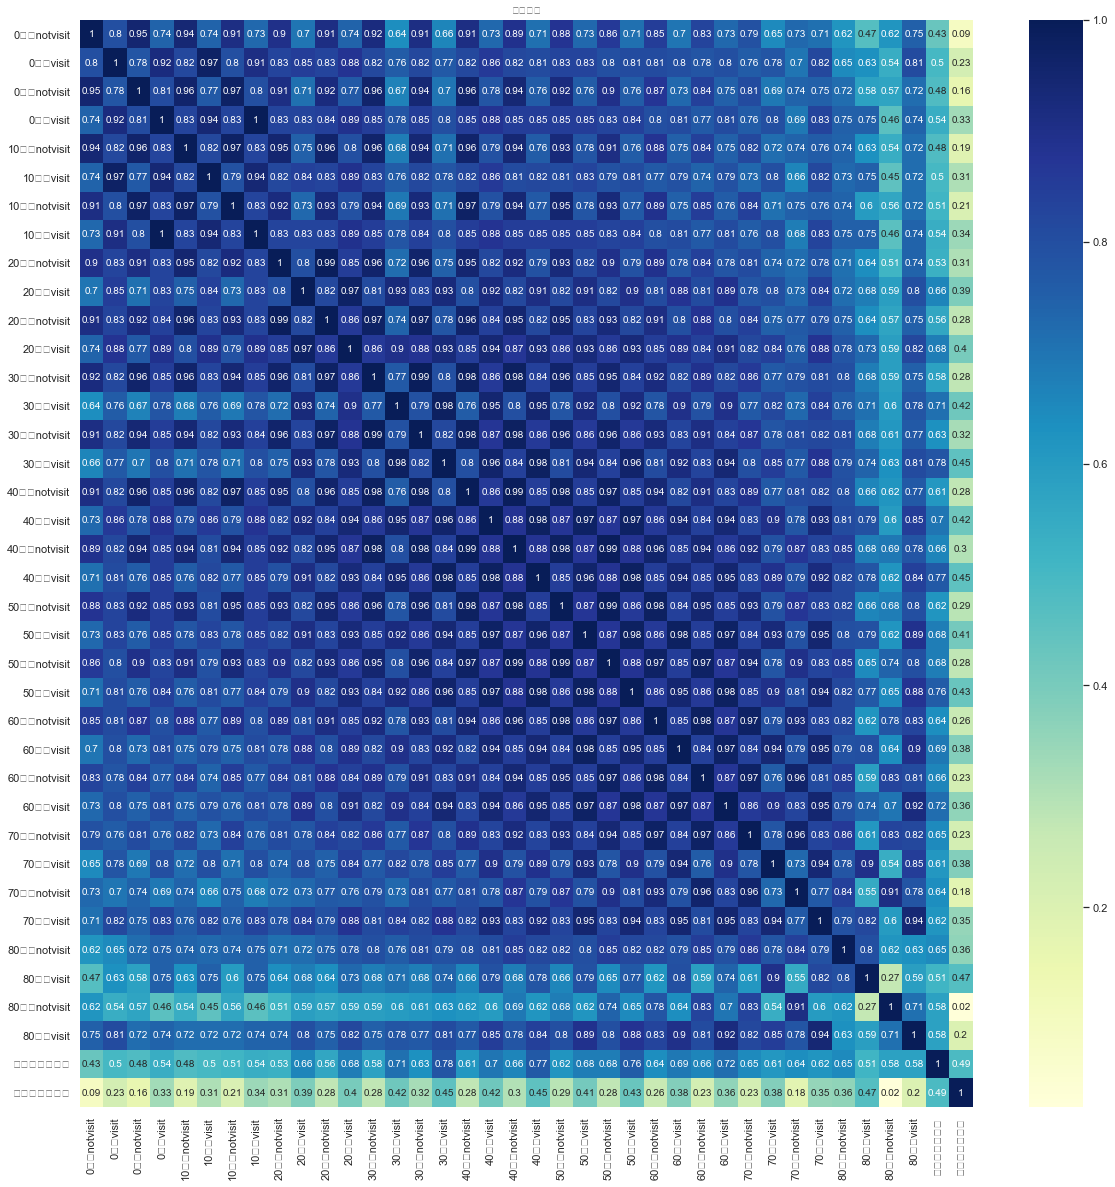

In [35]:
# 크기 설정
# plt.figure(figsize = (15,8))
# plt.gcf().set_size_inches(15, 8)
sns.set(rc = {'figure.figsize':(20,20)})

sns.heatmap(fp_corr, cmap='YlGnBu', annot=True, annot_kws={'size':10})

plt.title('유동인구', fontsize=10)
plt.show()

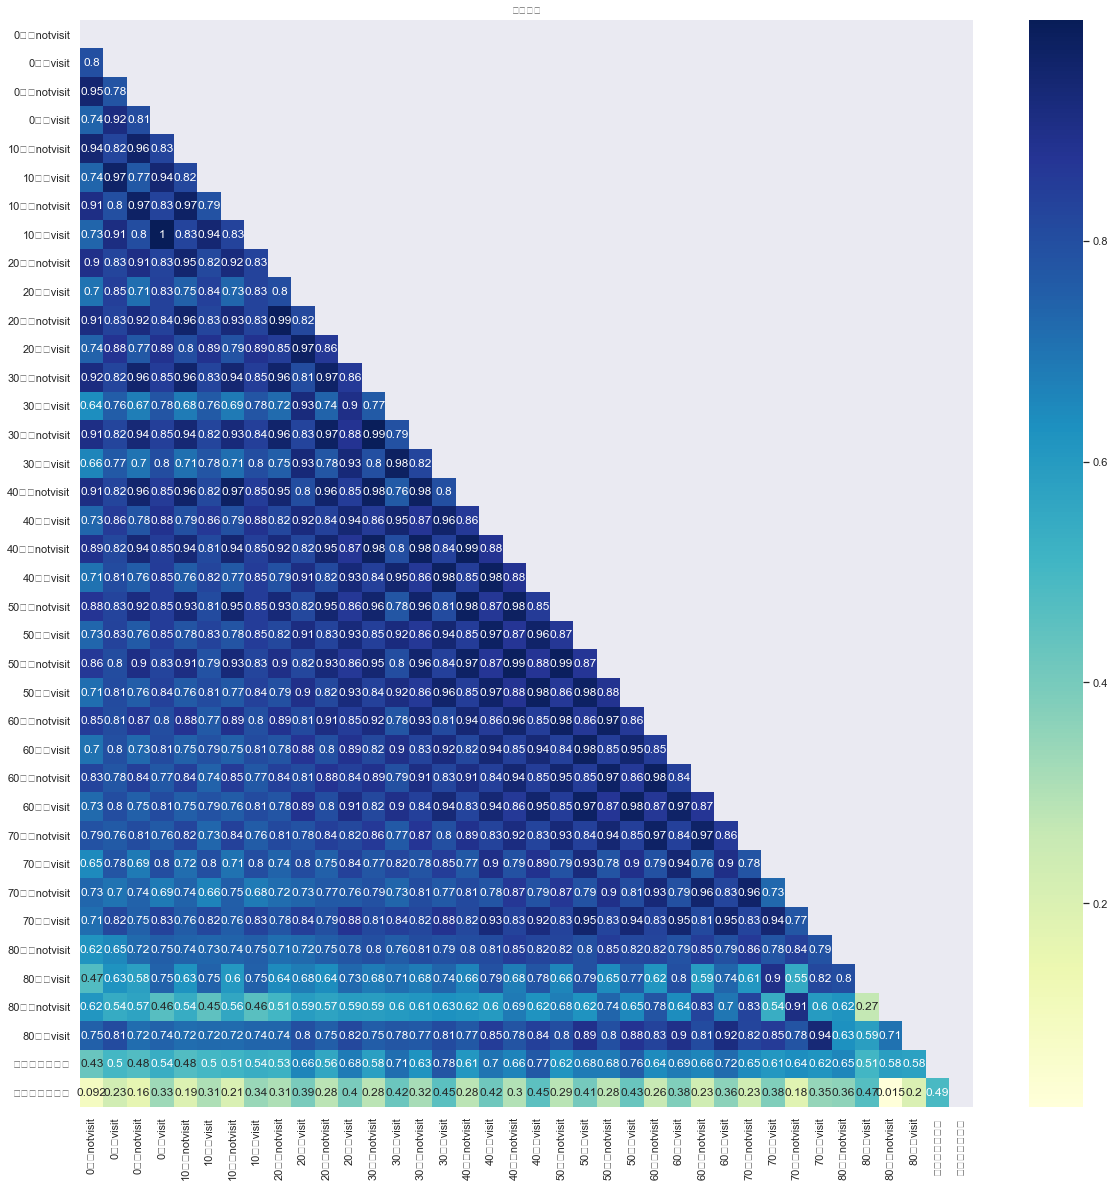

In [39]:
# 절반 생각
sns.set(rc = {'figure.figsize':(20,20)})

upp_mat = np.triu(corr)

sns.heatmap(fp_corr, annot=True, cmap='YlGnBu', mask = upp_mat)

plt.title('유동인구', fontsize=10)
plt.show()

In [78]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error

In [ ]:
# import datetime

# df['base_date'] = pd.to_datetime(df['base_date']) 

# # 년도 추출
# df['Year'] = df['base_date'].dt.year
# # 월 추출
# df['Month'] = df['base_date'].dt.month
# # 일 추출
# df['Day'] = df['base_date'].dt.day

# df_2018_fh = df[(df['year']=='2018' & df['month'] <= '06')]
# df_2018_fh.head()

In [51]:
df_2018_fh = df[(df['base_date']<'2018-07')]
df_2018_sh = df[(df['base_date']>'2018-07') & (df['base_date']<'2019')]
df_2019_fh = df[(df['base_date']>'2019') & (df['base_date']<'2019-07')]
df_2019_sh = df[(df['base_date']>'2019-07') & (df['base_date']<'2020')]
df_2020_fh = df[(df['base_date']>'2020') & (df['base_date']<'2020-07')]
df_2020_sh = df[(df['base_date']>'2020-07') & (df['base_date']<'2021')]
df_2021_fh = df[(df['base_date']>'2021')]

In [52]:
df_2018_fh.head()

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),배출량
0,2018-01-01,서귀포시,남원읍,11030.2331,9791.3235,11498.2617,10650.5811,13324.2924,10954.4914,15372.8110,...,2199680,24828201,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,1239600
1,2018-01-01,서귀포시,대륜동,17647.5285,10160.5833,15216.9486,10298.1857,14152.0528,11361.8229,12541.6031,...,354993,37971731,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,1717700
2,2018-01-01,서귀포시,대정읍,12538.2881,7792.5662,14360.4369,6043.2109,16053.7231,8710.5446,19530.3550,...,2730942,37142481,6.1,0.0,58.4,1018.5,7.72,0.0,0.0,1264950
3,2018-01-01,서귀포시,대천동,10539.1926,7307.2766,10214.4234,7677.3523,7645.1222,8157.7877,7511.4389,...,687498,39231391,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,1765600
4,2018-01-01,서귀포시,동홍동,20141.3526,7741.1595,22060.7555,8331.2173,28043.7082,8607.6880,31639.5584,...,2572840,69274797,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,4165050


In [53]:
df_2018_fh.tail()

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),배출량
6692,2018-06-30,제주시,이도2동,80551.2166,41554.9106,79779.6895,41919.5825,101272.0276,46076.7300,99818.2037,...,17235117,135424567,24.0,47.8,92.0,1006.6,4.67,0.0,9.4,7295400
6693,2018-06-30,제주시,이호동,3330.3071,2433.1056,4412.3437,2493.7046,3378.5724,2705.7505,5210.3058,...,0,9299945,24.0,47.8,92.0,1006.6,4.67,0.0,9.4,605700
6694,2018-06-30,제주시,일도1동,850.7498,3049.2179,1159.8369,2113.4566,1297.3954,3374.2113,1547.4802,...,5463640,7495017,24.0,47.8,92.0,1006.6,4.67,0.0,9.4,554750
6695,2018-06-30,제주시,일도2동,38771.3003,15460.8127,36840.4983,16234.5329,47876.7950,17159.4934,50227.4056,...,19921587,95725295,24.0,47.8,92.0,1006.6,4.67,0.0,9.4,4951600
6696,2018-06-30,제주시,화북동,42425.1441,12434.9832,42377.2676,13265.1512,45251.4010,13834.2694,52222.4269,...,9622379,57086294,24.0,47.8,92.0,1006.6,4.67,0.0,9.4,3322750


In [54]:
df_2018_sh.head()

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),배출량
6697,2018-07-01,서귀포시,남원읍,11280.5985,4372.9992,11479.9450,5610.8058,13612.7756,4907.1454,15407.5826,...,1733940,31824419,25.2,3.2,99.0,999.0,0.00,0.0,10.0,2033700
6698,2018-07-01,서귀포시,대륜동,20781.3558,6137.7039,18571.3670,6432.5488,16744.7640,6844.2464,15142.3048,...,2374658,62782559,25.2,3.2,99.0,999.0,0.00,0.0,10.0,2444400
6699,2018-07-01,서귀포시,대정읍,14135.3173,4733.9554,15847.5161,4552.6424,18055.4207,5320.8515,21519.3753,...,6586502,52341819,25.4,2.2,97.3,999.4,15.42,0.0,0.0,2015350
6700,2018-07-01,서귀포시,대천동,12022.0193,5327.4936,11222.1731,3977.7173,8740.2745,5929.5945,8351.5139,...,1585740,68679289,25.2,3.2,99.0,999.0,0.00,0.0,10.0,1691100
6701,2018-07-01,서귀포시,동홍동,24756.1092,7479.2987,27563.9284,8039.4804,34253.2145,8288.0602,39257.1910,...,3694330,107249672,25.2,3.2,99.0,999.0,0.00,0.0,10.0,4678700


In [55]:
df_2018_sh.tail()

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),배출량
13500,2018-12-31,제주시,이도2동,81841.6246,44145.9817,81876.2692,47601.6829,102583.6463,48967.7159,102131.1576,...,34217078,131902445,4.6,0.0,58.6,1033.2,4.81,0.0,8.3,8000600
13501,2018-12-31,제주시,이호동,2696.1367,2959.5319,3481.6714,2520.3986,2737.5800,3306.8876,4111.3998,...,2215212,10978931,4.6,0.0,58.6,1033.2,4.81,0.0,8.3,615150
13502,2018-12-31,제주시,일도1동,853.3875,3489.6937,915.7347,2680.7052,1252.5988,3862.3771,1236.2418,...,1208307,5308863,4.6,0.0,58.6,1033.2,4.81,0.0,8.3,647500
13503,2018-12-31,제주시,일도2동,38708.4279,15181.9637,34282.8188,13515.2783,47782.9300,16858.0044,46678.5919,...,40527515,79418469,4.6,0.0,58.6,1033.2,4.81,0.0,8.3,5722400
13504,2018-12-31,제주시,화북동,40750.1693,11518.6115,43761.4188,13726.1777,43492.0789,12822.5806,53772.7405,...,63517130,57678406,4.6,0.0,58.6,1033.2,4.81,0.0,8.3,3865200


In [56]:
df_2019_fh.head()

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),배출량
13505,2019-01-01,서귀포시,남원읍,11084.2437,8910.3760,12313.7766,9433.3089,13398.9443,9981.7098,16458.1959,...,1327920,24383730,5.1,0.0,62.1,1025.8,0.00,0.0,7.0,1324550
13506,2019-01-01,서귀포시,대륜동,19980.5042,10529.6119,19388.0804,10724.8061,15987.4773,11800.7461,15840.0136,...,1126720,30113252,5.1,0.0,62.1,1025.8,0.00,0.0,7.0,1631150
13507,2019-01-01,서귀포시,대정읍,14687.1851,5984.6466,16426.5655,5909.2306,18794.6791,6673.4577,22353.6804,...,3004067,41481600,5.1,0.0,64.8,1024.3,1.63,0.0,9.3,1683950
13508,2019-01-01,서귀포시,대천동,10341.4093,6100.7814,10824.7901,5213.3725,7372.0334,6795.3058,8057.9351,...,452700,41955180,5.1,0.0,62.1,1025.8,0.00,0.0,7.0,1518600
13509,2019-01-01,서귀포시,동홍동,21868.9190,8044.6990,25660.4811,7881.9991,30440.5210,8946.5567,36650.1093,...,1584450,94533116,5.1,0.0,62.1,1025.8,0.00,0.0,7.0,3510350


In [57]:
df_2019_fh.tail()

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),배출량
20197,2019-06-30,제주시,이도2동,70830.9884,35255.3261,70764.8587,39889.9158,89126.9815,39042.9584,88486.0505,...,13418483,136532921,23.4,0.4,88.0,1000.8,12.39,0.0,9.0,9744400
20198,2019-06-30,제주시,이호동,2740.8261,1972.2067,3469.1777,2589.4880,2780.5483,2194.8594,4095.5635,...,439878,12594389,23.4,0.4,88.0,1000.8,12.39,0.0,9.0,936850
20199,2019-06-30,제주시,일도1동,1142.1115,2798.6222,692.9452,1915.4207,1683.0089,3087.8370,931.8718,...,1239975,11962828,23.4,0.4,88.0,1000.8,12.39,0.0,9.0,633000
20200,2019-06-30,제주시,일도2동,36685.5389,13806.1327,33084.7231,13055.8010,45393.8894,15341.9626,45124.4688,...,11454463,81170768,23.4,0.4,88.0,1000.8,12.39,0.0,9.0,6622950
20201,2019-06-30,제주시,화북동,39357.5793,12455.3090,40019.5759,12467.4895,41972.7292,13822.3003,49293.6566,...,4741915,54543670,23.4,0.4,88.0,1000.8,12.39,0.0,9.0,4947950


In [58]:
df_2019_sh.head()

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),배출량
20202,2019-07-01,서귀포시,남원읍,9089.3812,2905.4881,9982.5471,4687.3420,10980.3420,3287.8865,13346.1851,...,1041815,26555274,21.8,3.4,99.0,1001.3,0.00,0.0,9.4,1884050
20203,2019-07-01,서귀포시,대륜동,24022.8689,6560.7821,15588.5297,5074.9398,20454.7254,7328.4081,13077.7661,...,14875280,43142655,21.8,3.4,99.0,1001.3,0.00,0.0,9.4,1803300
20204,2019-07-01,서귀포시,대정읍,13990.2772,2960.5150,15520.8595,4096.4943,17662.3232,3319.7462,20943.9160,...,6143780,31664853,21.6,2.1,99.0,998.8,7.83,0.0,8.4,3027450
20205,2019-07-01,서귀포시,대천동,10746.1655,3814.3606,11405.5593,5010.3525,7971.6791,4236.5918,8918.9902,...,3563533,32900296,21.8,3.4,99.0,1001.3,0.00,0.0,9.4,1853600
20206,2019-07-01,서귀포시,동홍동,23750.7430,8222.6060,31584.8256,9069.1339,32616.8768,9163.6984,44558.6657,...,6469202,85771170,21.8,3.4,99.0,1001.3,0.00,0.0,9.4,4324500


In [59]:
df_2019_sh.tail()

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),배출량
27230,2019-12-31,제주시,일도2동,46031.7949,22585.2971,29073.3069,13510.3818,39858.7109,17462.8755,38324.5106,...,24259848,78794537,2.9,0.0,61.6,1031.3,4.10,0.0,8.6,4962600
27231,2019-12-31,제주시,조천읍,29590.9458,18464.1386,23057.4689,14120.9832,21358.2959,14425.5508,25474.0923,...,5473317,48258384,2.9,0.0,61.6,1031.3,4.10,0.0,8.6,982200
27232,2019-12-31,제주시,한경면,8826.5669,3047.6927,4067.8807,3018.9817,6573.3754,2371.7916,4596.2694,...,1899732,13438050,2.9,1.0,68.3,1023.0,1.77,0.0,9.3,266600
27233,2019-12-31,제주시,한림읍,21645.4124,10083.3333,21631.5301,6986.8155,17075.1107,7888.3210,25173.8388,...,2955328,30856277,2.9,1.0,68.3,1023.0,1.77,0.0,9.3,1755550
27234,2019-12-31,제주시,화북동,43648.7118,18350.0158,39373.8478,14451.0228,34889.8620,14194.1748,46352.8633,...,21770801,63444344,2.9,0.0,61.6,1031.3,4.10,0.0,8.6,3565850


In [60]:
df_2020_fh.head()

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),배출량
27235,2020-01-01,서귀포시,남원읍,16057.5235,12168.9655,11658.8035,9392.5943,14239.2045,9472.8060,15470.0434,...,1147500,20019591,7.0,0.0,75.0,1024.4,0.00,0.0,6.8,1940600
27236,2020-01-01,서귀포시,대륜동,25440.6183,12602.6996,18679.7846,12810.1615,14519.9726,9760.6852,15652.7701,...,841500,48469176,7.0,0.0,75.0,1024.4,0.00,0.0,6.8,1926000
27237,2020-01-01,서귀포시,대정읍,20514.0044,9617.9187,16235.8834,5660.4660,17256.0309,7453.8608,21773.2851,...,3808374,37805591,5.2,0.0,68.8,1023.0,8.71,0.0,8.8,3048800
27238,2020-01-01,서귀포시,대천동,14292.7416,8743.4388,12012.4032,6596.8316,7517.2775,6767.9814,9643.4773,...,1066706,56882799,7.0,0.0,75.0,1024.4,0.00,0.0,6.8,2003550
27239,2020-01-01,서귀포시,동홍동,34922.0725,11677.2443,24862.3016,7148.2315,32067.6356,9022.9179,34865.9995,...,805800,88438233,7.0,0.0,75.0,1024.4,0.00,0.0,6.8,4294050


In [61]:
df_2020_fh.tail()

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),배출량
34443,2020-06-30,제주시,일도2동,44517.7413,16966.4321,28480.3767,8206.8548,38756.1391,13044.1130,37558.5630,...,16634880,49766605,21.8,0.0,84.3,997.0,15.77,0.0,9.0,5712550
34444,2020-06-30,제주시,조천읍,27588.3909,11096.6461,21342.0029,7684.1372,19845.8039,8626.8811,23514.9121,...,8245996,48526950,21.8,0.0,84.3,997.0,15.77,0.0,9.0,2237250
34445,2020-06-30,제주시,한경면,8010.6306,4023.2935,5031.9384,1501.7023,5944.9309,3107.9963,5692.8509,...,2778112,14289766,21.2,0.0,93.0,991.3,18.95,0.0,7.7,754700
34446,2020-06-30,제주시,한림읍,21172.5369,9634.1461,22460.1800,14159.2163,16717.6238,7451.0584,26139.2255,...,15708467,24258253,21.2,0.0,93.0,991.3,18.95,0.0,7.7,2903750
34447,2020-06-30,제주시,화북동,46472.1761,14165.6212,42704.6460,24662.7522,37240.8836,10907.2762,50311.0062,...,48480614,40834970,21.8,0.0,84.3,997.0,15.77,0.0,9.0,4157600


In [62]:
df_2020_sh.head()

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),배출량
34448,2020-07-01,서귀포시,남원읍,12954.1473,2382.0019,10237.5360,2622.9204,11451.9528,1852.7892,13581.5595,...,3399611,17822788,22.4,0.0,76.0,1000.1,0.00,0.0,1.8,2080500
34449,2020-07-01,서귀포시,대륜동,34201.2667,6517.8709,16609.6030,4687.4735,21191.2541,5025.1652,14053.9488,...,3809509,30661091,22.4,0.0,76.0,1000.1,0.00,0.0,1.8,1632700
34450,2020-07-01,서귀포시,대정읍,26086.7751,5187.1506,20930.5224,3478.3660,21788.1928,3994.0354,27807.3545,...,31386467,35802958,21.1,0.0,87.4,998.3,26.19,0.0,3.1,3240100
34451,2020-07-01,서귀포시,대천동,17687.9100,5190.1419,12767.2219,3756.3589,9226.0460,3989.2547,9984.1715,...,1225163,36398895,22.4,0.0,76.0,1000.1,0.00,0.0,1.8,1647681
34452,2020-07-01,서귀포시,동홍동,37387.2981,9925.8456,34657.3859,6676.0463,34125.7116,7624.1370,47291.6971,...,5560825,76043989,22.4,0.0,76.0,1000.1,0.00,0.0,1.8,3724900


In [63]:
df_2020_sh.tail()

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),배출량
41583,2020-12-31,제주시,일도2동,57356.0371,17269.4023,39596.5790,11375.7867,49997.1006,13333.0393,52360.0987,...,18739155,83811415,2.9,3.8,67.9,1024.3,3.00,1.6,8.8,4777500
41584,2020-12-31,제주시,조천읍,36063.3317,7286.8682,27073.9300,6420.0229,25933.8664,5689.4226,29863.5052,...,14686229,47876358,2.9,3.8,67.9,1024.3,3.00,1.6,8.8,1574650
41585,2020-12-31,제주시,한경면,9760.1878,3377.1851,5693.2677,2978.5051,7239.9514,2614.1696,6432.3785,...,7696657,7313930,3.1,0.7,74.8,1016.7,2.29,0.0,9.0,556450
41586,2020-12-31,제주시,한림읍,24693.6150,6089.4033,23757.3872,4709.7860,19513.6582,4741.0925,27668.3443,...,9564370,39036595,3.1,0.7,74.8,1016.7,2.29,0.0,9.0,2055400
41587,2020-12-31,제주시,화북동,57459.8185,12576.6164,48991.8306,9726.4867,46036.6488,9695.6997,57738.8711,...,90630756,76476179,2.9,3.8,67.9,1024.3,3.00,1.6,8.8,3782800


In [64]:
df_2021_fh.head()

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),배출량
41588,2021-01-01,서귀포시,남원읍,18246.7471,6773.2003,14917.9805,5084.6168,16238.9281,5242.4788,19789.7735,...,1280180,25920356,4.7,0.0,61.4,1020.0,0.00,0.0,7.9,1828300
41589,2021-01-01,서귀포시,대륜동,30661.3324,6906.4253,24957.5013,6923.4873,17541.6576,5328.2237,20633.3573,...,5229510,38260330,4.7,0.0,61.4,1020.0,0.00,0.0,7.9,1312600
41590,2021-01-01,서귀포시,대정읍,28915.4277,8478.0664,22412.8336,6530.3890,24302.1872,6540.0712,30085.6209,...,1808950,48468121,5.6,0.0,63.9,1017.5,1.69,0.0,9.1,3485800
41591,2021-01-01,서귀포시,대천동,21008.6768,5652.9546,15235.2611,4076.3644,10801.0062,4355.3966,11491.5715,...,3454968,62010452,4.7,0.0,61.4,1020.0,0.00,0.0,7.9,2373450
41592,2021-01-01,서귀포시,동홍동,42988.8385,7753.2885,29899.5510,5613.7344,39573.6153,5965.2513,42311.9096,...,3041060,100004474,4.7,0.0,61.4,1020.0,0.00,0.0,7.9,3511950


In [65]:
df_2021_fh.tail()

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),배출량
48416,2021-06-30,제주시,일도2동,48057.8395,18562.2277,30770.1050,10532.0118,41791.7039,14277.3294,40655.9314,...,13624338,52547555,24.9,0.0,75.1,1004.0,19.91,0.0,5.3,4963450
48417,2021-06-30,제주시,조천읍,30216.3887,14827.6615,21878.8003,9076.8035,21784.9016,11604.2870,24200.9821,...,20933190,28210604,24.9,0.0,75.1,1004.0,19.91,0.0,5.3,2175450
48418,2021-06-30,제주시,한경면,9193.6955,3548.3814,6477.0927,1736.8238,6839.1511,2765.9751,7319.9596,...,4176912,17679746,24.0,0.0,94.4,998.0,16.37,0.0,5.6,973850
48419,2021-06-30,제주시,한림읍,26110.8260,17203.7474,25456.5456,12150.2043,20592.9715,13470.3068,29606.2524,...,13545991,42071373,24.0,0.0,94.4,998.0,16.37,0.0,5.6,3298100
48420,2021-06-30,제주시,화북동,47158.1302,17646.9049,45039.1572,22722.0188,37776.5360,13590.1558,53042.8681,...,46895646,48460831,24.9,0.0,75.1,1004.0,19.91,0.0,5.3,3749600


# 2020년 상반기 'df_2020_fh' 

In [68]:
df_2020_fh.head(3)

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),배출량
27235,2020-01-01,서귀포시,남원읍,16057.5235,12168.9655,11658.8035,9392.5943,14239.2045,9472.8060,15470.0434,...,1147500,20019591,7.0,0.0,75.0,1024.4,0.00,0.0,6.8,1940600
27236,2020-01-01,서귀포시,대륜동,25440.6183,12602.6996,18679.7846,12810.1615,14519.9726,9760.6852,15652.7701,...,841500,48469176,7.0,0.0,75.0,1024.4,0.00,0.0,6.8,1926000
27237,2020-01-01,서귀포시,대정읍,20514.0044,9617.9187,16235.8834,5660.4660,17256.0309,7453.8608,21773.2851,...,3808374,37805591,5.2,0.0,68.8,1023.0,8.71,0.0,8.8,3048800


In [67]:
df_2020_fh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7213 entries, 27235 to 34447
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   base_date       7213 non-null   object 
 1   city            7213 non-null   object 
 2   emd_nm          7213 non-null   object 
 3   0여성notvisit     7213 non-null   float64
 4   0여성visit        7213 non-null   float64
 5   0남성notvisit     7213 non-null   float64
 6   0남성visit        7213 non-null   float64
 7   10여성notvisit    7213 non-null   float64
 8   10여성visit       7213 non-null   float64
 9   10남성notvisit    7213 non-null   float64
 10  10남성visit       7213 non-null   float64
 11  20여성notvisit    7213 non-null   float64
 12  20여성visit       7213 non-null   float64
 13  20남성notvisit    7213 non-null   float64
 14  20남성visit       7213 non-null   float64
 15  30여성notvisit    7213 non-null   float64
 16  30여성visit       7213 non-null   float64
 17  30남성notvisit    7213 non-nul

In [71]:
X = df_2020_fh.iloc[:, 3:-1]
y = df_2020_fh['배출량']
X.head(3)

,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,10남성visit,20여성notvisit,20여성visit,...,use_amt식품,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10)
27235,16057.5235,12168.9655,11658.8035,9392.5943,14239.2045,9472.8060,15470.0434,11026.0484,7862.3194,17062.0695,...,8173107,1147500,20019591,7.0,0.0,75.0,1024.4,0.00,0.0,6.8
27236,25440.6183,12602.6996,18679.7846,12810.1615,14519.9726,9760.6852,15652.7701,15074.3501,11743.5827,13662.3036,...,2704224,841500,48469176,7.0,0.0,75.0,1024.4,0.00,0.0,6.8
27237,20514.0044,9617.9187,16235.8834,5660.4660,17256.0309,7453.8608,21773.2851,6627.8590,9271.8248,8118.3873,...,8441622,3808374,37805591,5.2,0.0,68.8,1023.0,8.71,0.0,8.8


In [95]:
from sklearn.model_selection import train_test_split

X = df_2020_fh.iloc[:, 3:-1]
y = df_2020_fh['배출량']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (5770, 50) (5770,)
Test Data :  (1443, 50) (1443,)


In [ ]:
# %%time

# XGB = XGBRegressor(booster = 'gblinear', 
#                    n_esimators=1000, 
#                    learning_rate=0.4, 
#                    reg_lambda=2.0, 
#                    n_jobs=-1, 
#                    random_state=42)

# XGB.fit(X_train, y_train)

In [96]:
xgb_reg = XGBRegressor(random_state=42, n_jobs=-1,
                       max_depth=7, n_estimators=100)

xgb_reg.fit(X_train, y_train)

[14:40:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=7, n_jobs=-1, random_state=42)

In [97]:
# Evaluation
mse = mean_squared_error(y_test, xgb_reg.predict(X_test))
np.sqrt(mse)

390715.43777740764

Text(0.5, 1.0, '2020년 상반기 XGB')

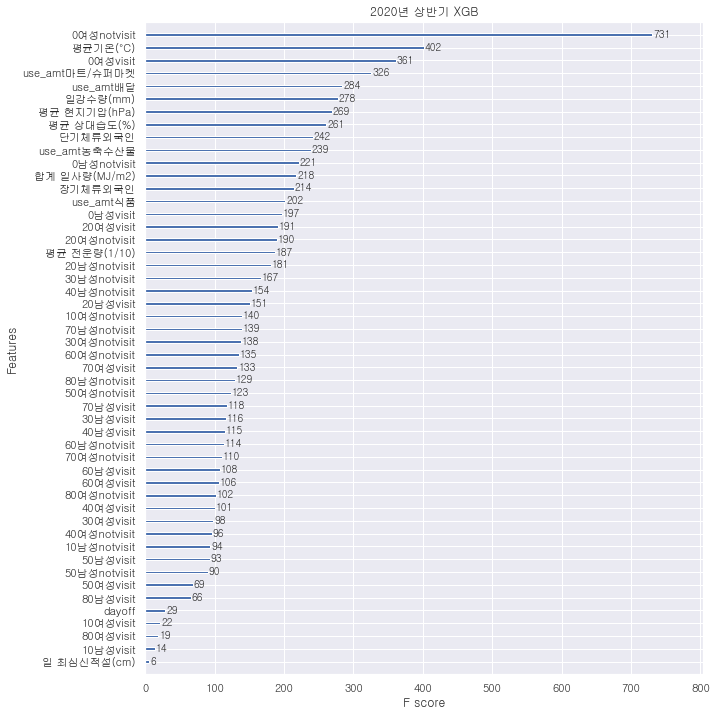

In [98]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_reg, ax=ax)
plt.title('2020년 상반기 XGB')

In [99]:
xgb_reg.feature_importances_

array([1.3752357e-03, 4.4033231e-04, 2.5356419e-02, 6.5404183e-04,
       9.6839499e-03, 3.6361460e-03, 6.6247255e-01, 1.1524586e-03,
       1.9584347e-03, 6.2413688e-04, 9.3373767e-04, 1.2625970e-03,
       2.9425069e-03, 1.6490170e-03, 2.1235591e-03, 2.1127467e-03,
       1.6522227e-01, 4.2889712e-04, 1.9564519e-03, 7.9345721e-04,
       1.7265178e-03, 1.3059597e-03, 6.6776952e-04, 1.6660281e-03,
       5.0544678e-03, 5.4709660e-04, 2.8400114e-03, 3.3496292e-03,
       8.4508546e-03, 9.2101452e-04, 9.3862712e-03, 7.3899940e-04,
       5.9341663e-03, 3.9534293e-02, 8.9077437e-03, 1.2604702e-03,
       1.8106195e-03, 6.5949652e-04, 4.1509152e-04, 1.0368349e-03,
       1.5965555e-03, 3.4177848e-04, 1.0069849e-02, 6.2391802e-04,
       1.1530216e-03, 7.1498821e-04, 6.0666236e-04, 1.1602232e-03,
       1.8652712e-04, 5.5425626e-04], dtype=float32)

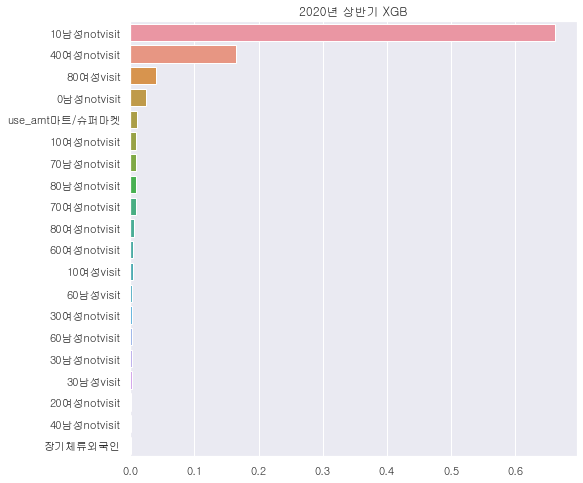

In [100]:
# 사이킷런
ftr_importances_values = xgb_reg.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,8))
# plt.title('Feature Importances Top 20')
plt.title('2020년 상반기 XGB')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# 2020년 하반기 'df_2020_sf'

In [87]:
from sklearn.model_selection import train_test_split

X = df_2020_sh.iloc[:, 3:-1]
y = df_2020_sh['배출량']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (5712, 50) (5712,)
Test Data :  (1428, 50) (1428,)


In [88]:
xgb_reg = XGBRegressor(random_state=42, n_jobs=-1,
                       max_depth=7, n_estimators=100)
xgb_reg.fit(X_train, y_train)

[14:38:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=7, n_jobs=-1, random_state=42)

In [89]:
# Evaluation
mse = mean_squared_error(y_test, xgb_reg.predict(X_test))
np.sqrt(mse)

300156.63295574853

Text(0.5, 1.0, '2020년 하반기 XGB')

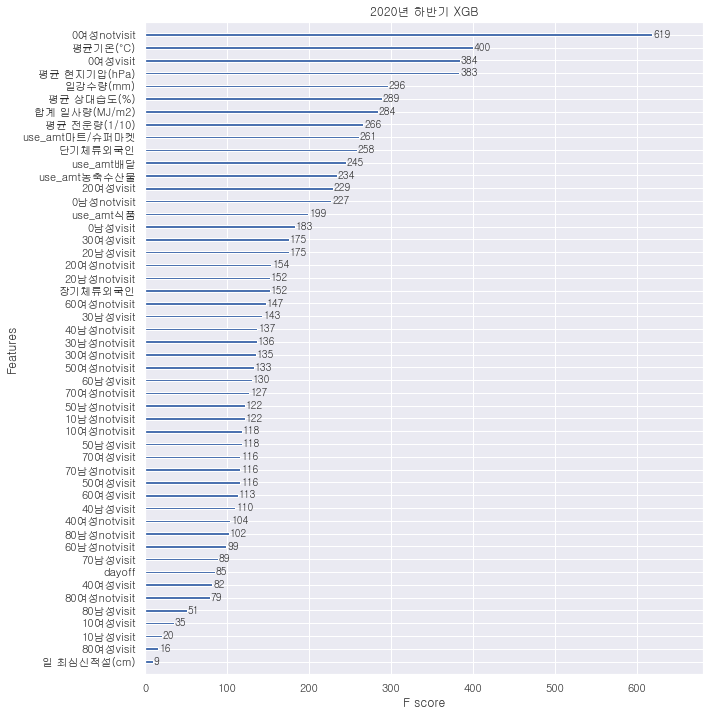

In [91]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_reg, ax=ax)
plt.title('2020년 하반기 XGB')

In [92]:
xgb_reg.feature_importances_

array([6.4618080e-03, 2.2248791e-03, 6.0629621e-03, 4.6552127e-04,
       2.9984785e-03, 3.8747618e-03, 2.1276234e-01, 1.9071501e-03,
       4.1997652e-03, 8.2740118e-04, 4.1981717e-03, 4.2904355e-03,
       4.6768938e-03, 5.7837728e-04, 1.5085173e-03, 4.2182729e-03,
       1.2803290e-03, 6.5680535e-04, 1.5473891e-03, 2.3905034e-03,
       5.6887299e-01, 4.7250296e-04, 3.8907970e-03, 1.0511840e-02,
       1.6741859e-02, 5.9438986e-04, 1.5082312e-03, 1.7551247e-03,
       2.4563544e-03, 4.3041937e-04, 4.6319962e-03, 1.0934591e-03,
       1.8919262e-03, 1.8586095e-03, 2.1460745e-03, 4.8592431e-04,
       1.7227066e-03, 7.7256974e-04, 1.0168807e-03, 7.3721051e-02,
       6.1580213e-04, 5.4947729e-04, 2.2954686e-02, 2.5352028e-03,
       1.7075385e-03, 5.5616675e-04, 1.3363464e-03, 4.9997694e-03,
       4.6607372e-04, 5.7242496e-04], dtype=float32)

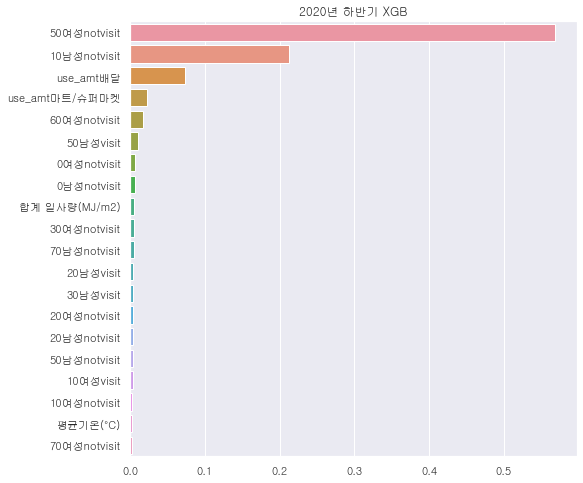

In [93]:
# 사이킷런
ftr_importances_values = xgb_reg.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,8))
plt.title('2020년 하반기 XGB')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()